In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy.stats as stats
import math

In [2]:
os.listdir()

['.ipynb_checkpoints', 'bank_customer_dataset.csv', 'Statistics.ipynb']

In [3]:
df = pd.read_csv("bank_customer_dataset.csv")

In [33]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,34579,35.0,admin.,single,university.degree,no,yes,no,cellular,may,thu,143.0,1,999.0,1.0,failure,-1.8,92.893,-46.2,1.266,5099.1,no
1,446,42.0,technician,married,professional.course,no,no,no,telephone,may,tue,1623.0,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,20173,36.0,admin.,married,university.degree,no,no,no,cellular,aug,mon,610.0,2,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
3,18171,37.0,admin.,married,high.school,no,yes,yes,telephone,jul,wed,1089.0,2,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
4,30128,31.0,management,single,university.degree,no,yes,no,cellular,apr,thu,211.0,1,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no


In [5]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,9280.0,NaN,NaN,NaN,24826.214224,12425.73376,1.0,14310.5,27390.0,36751.5,41186.0
age,9279.0,NaN,NaN,NaN,40.45673,11.96193,17.0,32.0,38.0,48.0,98.0
job,9280,12,admin.,2561,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,9280,4,married,5393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,9280,8,university.degree,3040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,9280,2,no,7777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,9280,3,yes,4937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,9280,3,no,7691,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,9280,2,cellular,6625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,9279,10,may,2511,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9280 non-null   int64  
 1   age             9279 non-null   float64
 2   job             9280 non-null   object 
 3   marital         9280 non-null   object 
 4   education       9280 non-null   object 
 5   default         9280 non-null   object 
 6   housing         9280 non-null   object 
 7   loan            9280 non-null   object 
 8   contact         9280 non-null   object 
 9   month           9279 non-null   object 
 10  day_of_week     9280 non-null   object 
 11  duration        9278 non-null   float64
 12  campaign        9280 non-null   int64  
 13  pdays           9278 non-null   float64
 14  previous        9279 non-null   float64
 15  poutcome        9280 non-null   object 
 16  emp.var.rate    9280 non-null   float64
 17  cons.price.idx  9280 non-null   f

<div class = "alert alert-block alert-info">
   Izmantojot ML modeļus, mērķis ir noskaidrot, vai klients veiks termiņdepozītu. Kā arī var veikt statistiskos testus, lai iegūtu ieskatu faktoros, kas ir saistīti ar gala rezultātu.
    </div>

### T-test, Vecuma ietekme uz klienta lēmumu par termiņdepozīta veikšanu.

<div class = "alert alert-block alert-info">
    Piemēram, vai ir statistiski nozīmīga atšķirība starp klienta vidējo vecumu un starp klientiem, kas veikuši termiņdepozītu. <br>
    Nulles hipotēze: Starp klientiem, kas veic un neveic termiņdepozītu, nepastāv statistiski nozīmīga atsķirība vidējā vecumā. <br>
    Hipotēze: Starp klientiem, kas veic un neveic termiņdepozītu, pastāv statistiski nozīmīga atsķirība vidējā vecumā.
    </div>

<Axes: xlabel='age', ylabel='Count'>

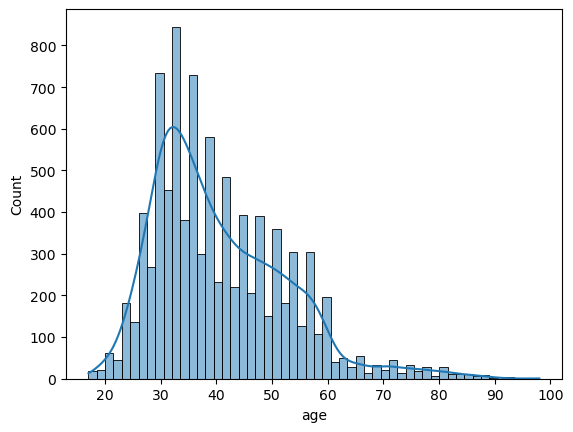

In [7]:
sns.histplot(df["age"], kde = True)

In [8]:
df.dropna(inplace = True)
age_yes = df[df["y"] == "yes"]["age"]
age_no = df[df["y"] == "no"]["age"]

In [9]:
print(age_yes.shape)
print(age_no.shape)

(4637,)
(4636,)


<Axes: xlabel='y', ylabel='age'>

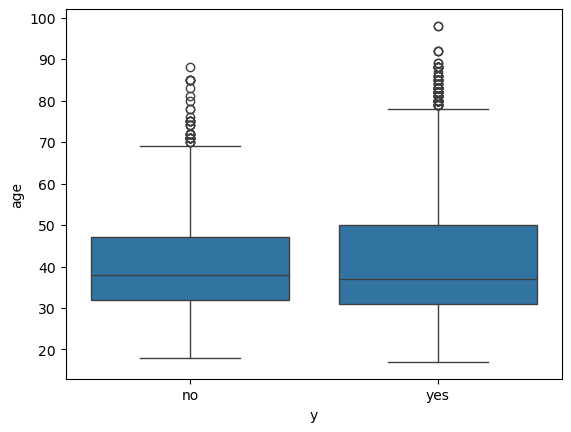

In [10]:
sns.boxplot(x = "y", y = "age", data = df)

In [11]:
# T_tests starp divām neatkarīgām grupām ( skaitliska un kategoriska )
# Velča T-tests, jo tas neveic pieņēmumu, ka dispersijas starp grupām ir vienādas, kad abās grupās vecumi variācija ir līdzīga
t_stat, p_value = stats.ttest_ind(age_yes,age_no,equal_var=False)
print(f"t vērtība: {t_stat},\np vērtība: {p_value}\nAge_yes vidējais: {age_yes.mean()}\nAge_no vidējais: {age_no.mean()}")

t vērtība: 3.6495322385878817,
p vērtība: 0.0002643284618540316
Age_yes vidējais: 40.91459995686866
Age_no vidējais: 40.00841242450388


<div class = "alert alert-block alert-success">
    Vecums ir statistiski saistīts ar klienta lēmumu veikt termiņdepozītu, tomēr šī saistība ir ļoti vāja, aptuveni ~ 1 gada starpība starp klientiem, kas ir veikuši un kas nav veikuši.
    </div>

### Chi-Squared tests, Cramers V, Profesijas ietekme uz klienta lēmumu par termiņdepozīta veikšanu.

<div class = "alert alert-block alert-info">
    Vai ir statistiska nozīme starp klienta profesiju un to, vai klients izvēlas veikt termiņdepozītu. <br>
    Nulles hipotēze: Klienta profesijai nav statistiski nozīmīga ietekme uz klienta lēmumu veikt vai neveikt termiņdepozītu. <br>
    Hipotēze: Klienta profesijai ir statistiski nozīmīga ietekme uz klienta lēmumu veikt vai neveikt termiņdepozītu.
    </div>

In [28]:
cont_table = pd.crosstab(df["job"], df["y"])
cont_table

y,no,yes
job,,
admin.,1209,1351
blue-collar,1094,638
entrepreneur,169,124
housemaid,130,106
management,325,328
retired,145,434
self-employed,171,149
services,456,322
student,53,275


In [20]:
# Chi-squared tests, jo tiek skatītas 2 kategoriskas vērtības
chi2_stat, p_value, dof, expected = stats.chi2_contingency(cont_table)
print(f"x2 vērtība = {chi2_stat}, p vērtība: {p_value}")

x2 vērtība = 465.518938416184, p vērtība: 7.153435001420924e-93


<div class = "alert alert-block alert-success">
    Chi-square tests norāda uz statistiski nozīmīgu saistību starp klienta profesiju un termiņdepozīta veikšanu (X2 = 465.52, p < 0.05). Nulles hipotēzi var droši noraidīt. <br>
    Tā kā darba kolonnā ir vairāk par 2 kategorijām, intereses pēc var veikt arī cramers V, lai pārbaudītu efekta lielumu starp mainīgajiem (0 - 1).
    </div>

In [29]:
n = cont_table.values.sum()
cramers_v = np.sqrt(chi2_stat / (n * (min(cont_table.shape) - 1)))
cramers_v

np.float64(0.22405701563286629)

<div class = "alert alert-block alert-success">
    Cramers V ar vērtību 0.22 norāda uz vāju/vidēju saistību starp mainīgajiem, 0.5 norādītu uz spēcīgu. Respektīvi, profesija nav galvenais faktors, kas ietekmē klienta lēmumu veikt termiņdepozīta noguldījumu.
    </div>

### Korelācija starp campaign ( pieņemsim, ka tas ir kontaktēšanās reižu skaits ) un klienta lēmumu veikt termiņdepozītu

<div class = "alert alert-block alert-info">
    Vai ir statistiska nozīme starp to, cik bieži komunicējam ar klientu un klienta lēmumu veikt termiņdepozītu. <br>
    Nulles hipotēze: Komunikācijas biežumam nepastāv statistiski nozīmīga saistība ar klienta lēmumu veikt termiņdepozītu. <br>
    Hipotēze: Komunikācijas biežumam ir statistiski nozīmīga saistība ar klienta lēmumu veikt termiņdepozītu.
    </div>

In [36]:
df["y_values"] = df["y"].replace("yes",1).replace("no",0)
df["y_values"]

C:\Users\dinar\AppData\Local\Temp\ipykernel_14664\679957223.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["y_values"] = df["y"].replace("yes",1).replace("no",0)


0       0
1       1
2       1
3       1
4       0
       ..
9274    1
9275    1
9277    0
9278    0
9279    0
Name: y_values, Length: 9273, dtype: int64

<Axes: xlabel='campaign', ylabel='Count'>

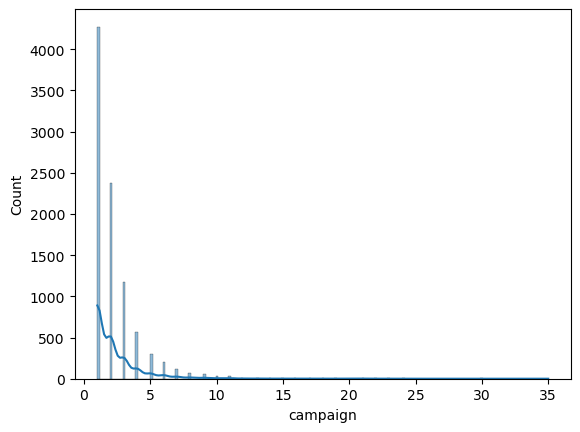

In [37]:
sns.histplot(df["campaign"],kde=True)

In [45]:
# Spearman, jo dati ir asimetriski. 
corr_coef, p_value = stats.pearsonr(df["campaign"],df["y_values"])
print(f"Korelācija: {corr_coef}, p vērtība: {p_value}")

Korelācija: -0.11743655184941065, p vērtība: 7.7213708847131e-30


<div class = "alert alert-block alert-success">
    Pearson korelācijas tests parāda, ka starp zvaniem un klienta lēmumu veikt termiņdepozītu ir ļoti vāja, bet statistiski nozīmīga korelācija.
    </div>

### ANOVA

<div class = "alert alert-block alert-info">
    Vai vidējais EURIBOR līmenis statistiski nozīmīgi atšķiras periodos, kuros klienti veica un neveica termiņdepozītu? <br>
    Nulles hipotēze: Vidējais EURIBOR līmenis neatšķiras starp klientiem, kuri veica termiņdepozītu un kuri nē. <br>
    Hipotēze: vidējais EURIBOR līmenis atšķiras starp klientiem, kuri veica termiņdepozītu un kuri nē.
    </div>

In [41]:
euribor_yes = df[df["y"] == "yes"]["euribor3m"]
euribor_no = df[df["y"] == "no"]["euribor3m"]

In [44]:
f_stat, p_value = stats.f_oneway(euribor_yes,euribor_no)
print(f"F-stat: {f_stat}\np vērtība: {p_value}\nEuribor_yes avg: {euribor_yes.mean()}\nEuribor_no avg: {euribor_no.mean()}")

F-stat: 2309.2029612916303
p vērtība: 0.0
Euribor_yes avg: 2.1237569549277553
Euribor_no avg: 3.8124868421052627


<div class = "alert alert-block alert-success">
    ANOVA tests norāda, ka ir statistiski nozīmīga atšķirība starp EURIBOR likmi periodos, kad klienti veic termiņdepozītu un kad nē. Vidējā EURIBOR likme, brīžos, kad klienti veica un neveica termiņdepozītu, atšķirās par ~ 1.7%.
    </div>